In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ext_compl_rd as ecr
import importlib

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Extended Complex Road

### With vs Without Control

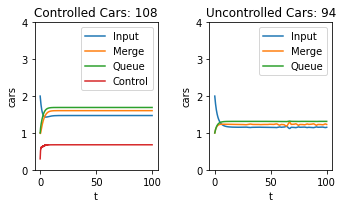

In [22]:
importlib.reload(ecr)

# Setup initial conditions
alpha = 1
gamma = 1
delta = 1
beta = 1
rho = 1
cap = 5.0

# Create Segments
begin_segment = ecr.BeginSegment(
    3., 
    ecr.ts(lambda c: (alpha - (alpha*c)/cap, -alpha/cap)),
    ecr.ts(lambda c, n: (gamma*c*(1-n/cap)*(1-c/cap), gamma - 2*gamma*c/cap - gamma*n/cap + 2*gamma*c*n/(cap**2), -gamma*c/cap + gamma*c**2/(cap**2)))                                 
)

merge_segment_yes_control = ecr.MergeSegment(
    4.,
    7.,
    5.,
    ecr.ts(lambda c, n: (delta*c*(1-c/cap), delta - 2*delta*c/cap, 0)),
    ecr.ts(lambda c, q: (beta*(1-c/cap), -beta*c/cap, 0)),
    # ecr.ts(lambda c, q: (0,0,0))
)

merge_segment_no_control = ecr.MergeSegment(
    4.,
    3.,
    5.,
    ecr.ts(lambda c, n: (delta*c*(1-c/cap), delta - 2*delta*c/cap, 0)),
    ecr.ts(lambda c, q: (beta*(1-c/cap), -beta*c/cap, 0)),
    ecr.ts(lambda c, q: (rho*q*(1-c/cap)*(1-q/cap), -rho*q/cap + rho*q**2/(cap**2), rho - 2*rho*q/cap - rho*c/cap + 2*rho*q*c/(cap**2)))
)

end_segment = ecr.EndSegment(
    5.0
)

# Setup the road
net_control = ecr.ExtComplRoad()
net_control.add(begin_segment)
net_control.add(merge_segment_yes_control)
net_control.add(end_segment)

# Setup initial conditions
ni, mi, li = 2., 1.0, 0.
init_roads = np.array([ni, mi, li])

q1 = 1.
init_queues = np.array([q1])

t0, tf = 0, 100
time_span = (t0, tf)
num_intervals = 2000

update_func = None

# Calculate the solution
roads, queues, control = net_control.multi_step(init_roads, init_queues, time_span, update_func, num_intervals)


# Work through the uncontrolled solution
net_no_control = ecr.ExtComplRoad()
net_no_control.add(begin_segment)
net_no_control.add(merge_segment_no_control)
net_no_control.add(end_segment)

# Calculate the uncontrolled solution
sol = net_no_control.uncontrolled_result(init_roads, init_queues, time_span)


# Plot the results
domain = np.linspace(t0, tf, 2002000)
uncontrolled_solution = sol(domain)
fig = plt.figure(figsize=(5,3))

plt.subplot(121)
plt.title(f"Controlled Cars: {-round(roads[-1][-1])}")
for i in range(2):
    plt.plot(domain, roads[i], label=["Input", "Merge"][i])
plt.plot(domain, queues[0], label="Queue")
plt.plot(domain, control[0], label="Control")
plt.xlabel('t')
plt.ylabel('cars')
plt.ylim(0,4)
plt.legend()

plt.subplot(122)
plt.title(f"Uncontrolled Cars: {round(uncontrolled_solution[0][-1][-1])}")
for i in range(2):
    plt.plot(domain, uncontrolled_solution[0][i], label=["Input", "Merge"][i])
plt.plot(domain, uncontrolled_solution[1][0], label="Queue")
plt.xlabel('t')
plt.ylabel('cars')
plt.ylim(0,4)
plt.legend()

plt.tight_layout()
plt.savefig("ControlvsNoControl.pdf", dpi=300)
# plt.plot()